# Day 2: Diving into Pandas

<img src="https://pbs.twimg.com/media/B_1KzLlUYAIFadB.jpg:large" width="200" height="200" />

## Outline of this notebook

2.0 [Importing `pandas` and `numpy`](#importing)

2.1 [Paths and Loading Data using `read_csv`](#paths)

2.2 [Basic `DataFrame` manipulations](#df)

2.3 [An Intro to Functions](#functions)

2.4 [Grouping](#grouping)

2.5 [Plotting](#plotting)

2.6 [Boxplots](#boxplots)

2.7 [Listing and looping over multiple files](#looping)

2.8 [Concatenating a list of `DataFrame`s](#concatentating)

2.9 [Discussion Question](#discuss)

Exploring imaris image data

2.9 [Exploring the Imaris Statistics](#imaris)

2.10 [Pivoting](#pivoting)

2.11 [Indexing](#indexing)

2.12 [Plotting our Dataset](#plotting2)

2.13 [Filtering](#filtering)

2.14 [Discussion Question](#discuss2)

2.15 [Summary](#summary)


Appendix (optional sections)

Welcome to Day 2! Python programmers often organize their code into chunks called modules. A module contains a set of related commands to accomplish a task. Today we are going to learn two of the most useful modules for data manipulation and plotting, `pandas` and `seaborn`. 

First we will use a simple data set on mouse weights taken from males and females of different strains to illustrate how to obtain simple descriptive statistics, group the data, and plot. 

Then, we will looking some imaging statistics data from Imaris and explore some more complex operations on the data.

## 2.0 importing `pandas` and `numpy` <a name="importing">

To start, we'll load up two modules with the `import` statement. Modules are bits of reusable code that can either be coded in a file (which we'll see in day 4) or *installed* as a package. 

The first module we'll load is the `pandas` module, which will let us manipulate 2D tables. We refer to the `pandas` module here as `pd` as an abbreviation. The second module we load is the `numpy` module, mostly for the arithmetic functions built into it. We will do much more with the `numpy` module in Days 3 and 4.

When you load a module using `import`, all of the functions available, such as `np.mean` are now accessible to you. Modules and import statements help programmers avoid naming conflicts because you can use short, straightforward names for functions and variables without worrying that they're already taken. Matlab does not have anything equivalent to Python's module system and therefore can be harder to read. 

<img src="https://imgs.xkcd.com/comics/python.png" width="400" height="400" />

In [1]:
import pandas as pd
import numpy as np

##Once imported, you can refer to the modules by `np`. 
##For example, we can take the mean of a list:
np.mean([2,4,6])

4.0

## 2.1 Paths and Loading Data using `read_csv` <a name="paths"

Before we even load the data, we need to tell Python where to find it. Our data is in the `data` directory in `day2`. We're going to specify the `path` or the folder location. There are two kinds of paths: *relative*, which is relative to our current directory, and *absolute*: the complete location of the directory. For example, the absolute path to the `data` folder on my Mac is: `/Users/laderast/Code/python_neurobootcamp/day2/data/`. 

The current directory for a Jupyter Notebook is always the directory where the notebook is located in. Since this notebook is in the `day2` directory, that is our current directory. All relative paths will be relative to this directory. You can check that `day2` is indeed your current working directory by using the `getcwd()` function in the `os` module. This will return the absolute path to your current directory: 

In [2]:
import os

#print "Current Working Directory (cwd)"
os.getcwd()

'/Users/Lucifer/Desktop/python_neurobootcamp/day-2'

Other things to keep in mind about path setting:
* If you are unsure of the path to your files, you can check by using a file explorer to navigate to the file, right click on it, and view properites. The path should be listed here 
* The separator (in this case it is a "/") will depend on your operating system: ("/" - Linux/mac, "\" windows)
* If you can, it's good practice to keep your Jupyter Notebook and your data in the same folder, and use relative paths to access everything. If someone wants to reproduce your analysis, they will be able to rerun everything in your notebook more easily. This makes your code more *reproducible*, which is really important these days. 
* IMPORTANT - Also be conscientious of how you name your files. This can be critical for writing robust, reliable scripts to analyze your data

Okay, let's get to work! Let's load the data up using the `pd.read_csv` function. The `read_csv` function is a part of the `pandas` module, so we have to include the `pd.` in front of it so the computer knows to look in the `pandas` module to find and use this function. By using `pd.read_csv`, we return what is called a `pandas` `DataFrame`.   Most of our manipulations and plotting are going to be done on this `DataFrame`.

A `DataFrame` can be thought of as a 2D table, but the values within each of the columns must be the same datatype. For example, any entry in the `MouseID` column must be a `string`, and any entry in the `Weight` column must be a `float`.

In [9]:
mousedata = pd.read_csv("data/mouseData.csv")
##show the whole DataFrame
mousedata

,MouseID,Sex,Strain,Weight
0,M1,M,B6,52.6
1,M2,M,B6,55.1
2,M3,M,B6,56.5
3,M4,M,B6,56.4
4,M5,M,D2,60.1
5,M6,M,D2,62.2
6,M7,M,D2,63.4
7,M8,M,D2,65.5
8,M9,F,B6,40.4
9,M10,F,B6,39.9


## 2.2 Basic DataFrame manipulations<a name="df">

The first thing to do with our `DataFrame` is to look at the first few rows of the function using `head()`. We often do this just to confirm that we loaded the data correctly (that it has the correct column names).

**Note**: the `.` notation lets us access built-in functions that are defined for any `DataFrame`. The built-in functions are also called *methods*. You can see all of the functions that you can do to a `DataFrame` by typing `mousedata.` into a code cell and hitting the `Tab` key. There's lots of them!

In [ ]:
mousedata.head()

A really useful method that we can immediately call on `mousedata` is `describe`. `describe` will return summary statistics on the numerical variables.

In [ ]:
mousedata.describe()

Another useful thing to note is the `.shape`, which returns the dimensions of the `DataFrame`. This can also be useful in confirming that we loaded the data in correctly.

Note that we don't use `()` after `.shape`. This is because `shape` is a `Property` and not a `method` for `DataFrame`. This can be really confusing at first. Reading the documentation for `DataFrame` will tell you what's a method and what's a property.

In [12]:
mousedata.shape

(16, 4)

(rows, columns) - it's the opposite in Matlab!

Sometimes we'd like to get the number of rows in our `DataFrame`. Since `mousedata.shape` is a tuple (a special kind of list), we can access it using `[0]`. This can be really useful when we need to do something over all of the rows.

In [10]:
##get number of rows in mousedata
mousedata.shape[0]

16

**Question**: How would we get the number of columns?

In [11]:
##Put your answer below.
mousedata.shape[1]

4

## 2.3 A Quick Intro to functions<a name="functions">

Before we can move forward, we need to talk about functions a little bit. You can think of a function as a bit of reusable code. The important thing is that you need to define the inputs (what goes into the function) and the output (what comes out of the function).

Try and run the following function. What does it do?

In [13]:
##always begin with "def" when defining a new function, 
##have an interface defined in the "()", 
##and the definition ends in ":"
def square_x(x):
    out = x * x
    return out

square_x(40)

1600

Let's look a bit more closely at how the `square_x` function is written. It begins with the word `def` (short for define) followed by the name of the function, a variable named in parenthesis, and a colon. The variable is the input to the function. The colon is also a necessary part of the function definition, and it begins the code block that defines what the function does.

The rest of the function consists of this code block. In Python, this block must be indented with either tabs or spaces. The last line in the block contains the word 'return' followed by a variable name. This variable is the output of the function.

## Exercise

Make a new function called `cube_y` that takes `y` as an input, and returns the cube of `y`. 

Run `cube_y(2)` to test out your function.

In [3]:
## space for your answer here
def cube_y(y):
    output=y**3
    return output

cube_y(2)


8

For the most part, we actually will want multiple inputs to our function, so we can do this by supplying more inputs to our function interface. Here we want to multiply two numbers together in our function, so we need to specify both `x` and `y` as inputs.

In [4]:
def mult_xy(x, y):
    out = x * y
    return out

mult_xy(10, 5)

50

Fortunately there are many built-in functions for simple tasks, as you saw yesterday. For example, let's use the built-in `rand()` function from `numpy` to create a `DataFrame` with 10 columns of 100 random numbers: 

In [5]:
data_m = np.random.rand(100,10)    # intitalize data matrix
print(data_m.shape)                # 100 rows X 10 columns

(100, 10)


We could also use built-in function `mean()` to take the mean of all of these numbers:

In [6]:
np.mean(data_m)

0.50084780550176466

Importantly, functions often have optional input values that allow you to use the function for more complicated tasks. For example, the documentation on `mean()` says that there is an optional input `axis` that allows you to compute means along a specific axis, i.e. columns (axis=0) or rows (axis=1). How would you modify the input above to compute means over the 10 colums?

In [7]:
#Space for answer here
np.mean(data_m, axis=0)

array([ 0.51614076,  0.46322378,  0.49579603,  0.50864834,  0.50394991,
        0.5264337 ,  0.50417435,  0.47206657,  0.48819439,  0.52985022])

## 2.4 Grouping <a name="grouping"\>

Let's get back to our `DataFrame`. We'll define a function and use it in conjunction with `groupby()`.  `groupby()` will group a `DataFrame` by the categories that exist in a column, and let you iterate through each group. 

In [14]:
group_mouse = mousedata.groupby(['Sex'])

In [15]:
##return only those mice with Sex = "M"
group_mouse.get_group('M')

,MouseID,Sex,Strain,Weight
0,M1,M,B6,52.6
1,M2,M,B6,55.1
2,M3,M,B6,56.5
3,M4,M,B6,56.4
4,M5,M,D2,60.1
5,M6,M,D2,62.2
6,M7,M,D2,63.4
7,M8,M,D2,65.5


What can you do with `groupby()`? One way to use it is to get *aggregate measures* based on group. For example, if we wanted to get the mean weight by gender, we can use the `apply` method on our data frames to return this. First we define a simple function called `mean_x` that returns the mean (we could have just used `np.mean` here, but it makes the code a little easier to understand).  

In [23]:
def mean_x(x):
    output=np.mean(x)
    return output

Then we can use the `apply()` function to get the mean by sex.

In [24]:
mousedata.groupby(['Sex']).apply(mean_x)

,Weight
Sex,
F,42.525
M,58.975


Note the the `apply()` function takes a function as input and applies it to every element, in this case male and female weights.

**Question**: why did the `groupby` only return `Weight`? (Hint: Does it make sense to do `mean_x` on our `Strain` variable?)

## 2.5 Plotting <a name="plotting">

Let's look at some ways to visualize our `DataFrame`. We are going to use a module called `seaborn` to do our plotting, because the default plot options are pretty good, so we have to do less customization of our plots. We will also use some features from the module that `seaborn` is based on, `matplotlib`. You will see more of `matplotlib` tomorrow as well. 

Let's just plot the distribution of weights as a histogram. How many bins does our histogram have?

In [25]:
# import seaborn and matplotlib
import seaborn as sns
import matplotlib.pylab as plt

##we need this line in our notebook to make matplotlib/seaborn work with Jupyter
%matplotlib inline

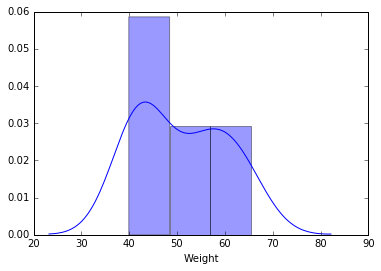

In [26]:
# Histogram of weights
sns.distplot(mousedata.Weight)

## Exercise

Look up the help for `sns.distplot`. Note that there is a long list of input variables that are set as equal to `None` or `False`. This means that these are optional input variables that, unless defined, will run at their default definitions.

To practice utilizing these optional inputs, change the number of bins to 40 in the plot.

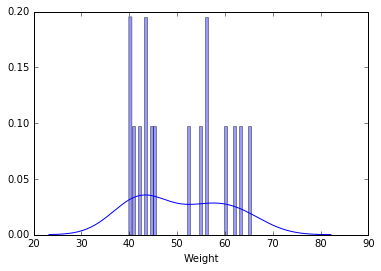

In [31]:
sns.distplot?

## Space for your answer here.

sns.distplot(mousedata.Weight, bins=40)



## 2.6 Boxplots (important!) <a name="boxplots"/>

Boxplots are super useful for looking at grouped medians. Here we use the `sns.boxplot` function and group by `Sex`.

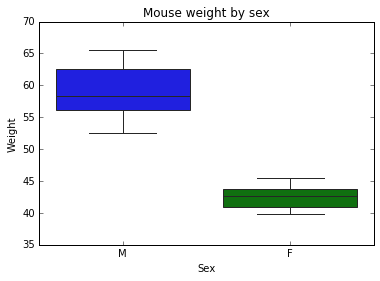

In [32]:
# Boxplot
sns.boxplot(x = "Sex", y="Weight", data=mousedata)

# Set title with matplotlib
plt.title('Mouse weight by sex')
plt.show()

## Exercise 

Create boxplots showing the weight data measured from the 2 different strains, B6 and D2. Make sure to add a title to your plot, such as "Weight by Strain".

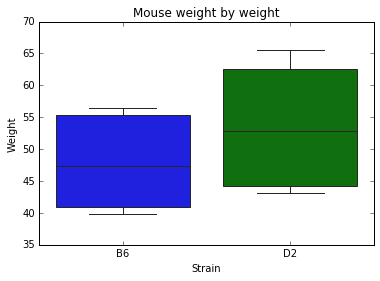

In [33]:
##Space for your answer here
# Boxplot
sns.boxplot(x = "Strain", y="Weight", data=mousedata)

# Set title with matplotlib
plt.title('Mouse weight by weight')
plt.show()

## 2.7 Listing and looping over multiple files (important!) <a name="looping"/>

One very important control structure to know is called a `for` loop. Basically, if we have a list of things, we can do the same thing to each element in the list. For example:



In [34]:
num_list = [1,4,9]

for num in num_list:
    print("I like the number " + str(num))

I like the number 1
I like the number 4
I like the number 9


There are a few things to note about the above code. 

1) The `for num in num_list:` line specifies how we refer to each element in the list. We're saying: let's grab an element from `num_list` and call it `num` for one cycle.

2) The `:` is how we specify where the start of the code we want to do over and over again with each element.

3) The code we want to do over and over again is *indented* under our `for` loop statement. The indentation is how we specify code blocks in python. 

4) Each cycle is called an *iteration*.

So what, why would we care? Remember when we used `pd.read_csv` above? We can do this for multiple files and return a `list` of `DataFrame`s. In order to do so, we'll use code in a module called `os` which will return a list of files in a directory. 

We're going to load files in the `data/maze_data` folder. These are experiments for mice running a maze with three replicates apiece.

The first thing we need to do is get all the file names into a list using `os.listdir`. Then we can use `pd.read_csv` to load each of the files as a `DataFrame`, and 

In [35]:
import os

path = "data/maze_data/"
file_list = os.listdir(path)
file_list


['mouseExpt3.txt', 'mouseExpt2.txt', 'mouseExpt1.txt']

What can we do with this list of file names? We can do the same thing over and over again over this list of file names, namely load each file as a `DataFrame`. We can do this with a `for` loop. 

`for` loops are a way to do something with each element of a list.


In [36]:
#start out with an empty list
mouse_list = []

for fi in file_list:
    full_path = path + fi
    print("loading: " + full_path)
    
    ##load our file as a DataFrame
    mouse_df = pd.read_csv(full_path, sep="\t")
    
    ##add a file_name column to mouse_df
    mouse_df["file_name"] = fi
    
    ##add our file into our list
    mouse_list.append(mouse_df)
    
#Show the contents of mouse_list
mouse_list

loading: data/maze_data/mouseExpt3.txt
loading: data/maze_data/mouseExpt2.txt
loading: data/maze_data/mouseExpt1.txt


[   MouseID  MazeTime1  MazeTime2  MazeTime3       file_name
 0      M20         78      60.50      58.70  mouseExpt3.txt
 1      M21         78        NaN        NaN  mouseExpt3.txt
 2      M22         53      46.75      41.45  mouseExpt3.txt
 3      M23         37      27.75      28.05  mouseExpt3.txt
 4      M24         40      31.00      32.00  mouseExpt3.txt
 5      M25         25      24.75        NaN  mouseExpt3.txt
 6      M26         80      68.00      58.00  mouseExpt3.txt
 7      M27         74      60.50      54.10  mouseExpt3.txt
 8      M28         30      26.50      25.50  mouseExpt3.txt
 9      M29         37      34.75      25.05  mouseExpt3.txt
 10     M30         76      61.00      51.40  mouseExpt3.txt,
   MouseID  MazeTime1  MazeTime2  MazeTime3       file_name
 0     M10         22      24.50      19.30  mouseExpt2.txt
 1     M11         53        NaN        NaN  mouseExpt2.txt
 2     M12         21      23.75      17.65  mouseExpt2.txt
 3     M13         16      

## 2.8 Concatenating a list of `DataFrame`s (important!) <a name="concatenating"/>

Okay, now we have a list of `DataFrame`s called `mouse_list`. We know that the column names are identical for each of our `DataFrame`s. Wouldn't it be easier if they were just one `DataFrame`?

We can basically glue them into a single `DataFrame` using `pd.concat`, which will combine them by `row`. 

In [37]:
big_mouse_frame = pd.concat(mouse_list)

big_mouse_frame

,MouseID,MazeTime1,MazeTime2,MazeTime3,file_name
0,M20,78,60.50,58.70,mouseExpt3.txt
1,M21,78,NaN,NaN,mouseExpt3.txt
2,M22,53,46.75,41.45,mouseExpt3.txt
3,M23,37,27.75,28.05,mouseExpt3.txt
4,M24,40,31.00,32.00,mouseExpt3.txt
5,M25,25,24.75,NaN,mouseExpt3.txt
6,M26,80,68.00,58.00,mouseExpt3.txt
7,M27,74,60.50,54.10,mouseExpt3.txt
8,M28,30,26.50,25.50,mouseExpt3.txt
9,M29,37,34.75,25.05,mouseExpt3.txt


## Exercise

What if you just wanted the last two `DataFrame`s in our list to be concatenated? How would we do that?

(Hint: think about subsetting your list. You should be able to do this in one line.)

In [39]:
## Space for your answer here
small_mouse_frame = pd.concat(mouse_list[:2])
small_mouse_frame

,MouseID,MazeTime1,MazeTime2,MazeTime3,file_name
0,M20,78,60.50,58.70,mouseExpt3.txt
1,M21,78,NaN,NaN,mouseExpt3.txt
2,M22,53,46.75,41.45,mouseExpt3.txt
3,M23,37,27.75,28.05,mouseExpt3.txt
4,M24,40,31.00,32.00,mouseExpt3.txt
5,M25,25,24.75,NaN,mouseExpt3.txt
6,M26,80,68.00,58.00,mouseExpt3.txt
7,M27,74,60.50,54.10,mouseExpt3.txt
8,M28,30,26.50,25.50,mouseExpt3.txt
9,M29,37,34.75,25.05,mouseExpt3.txt


## 2.9 Discussion question <a name="discuss"/>


3. Why would we want to use `for` loops? How are `for` loops useful with lists? 

# A more complicated example

We're going to do much more manipulation and visualization with `pandas` using data taken from Imaris. Imaris is image analysis software with many sophisticated functions. Below is a confocal image taken of inner hair cells stained with antibodies against *CtBP2* (a pre-synaptic ribbon marker), *GluR2* (a post-synaptic receptor) and *MyosinVIIA* (which labels the entire hair cell). There are three color channels (red, green, and blue) which indicate the intensity of the staining for *CtBP2*, *GluR2* and *MyosinVIIa*, respectively.


## The data

Up to 25 auditory nerve fibers synapse onto individual inner hair cells in
normal-hearing individuals. However, these synapses can be permanently lost due
to aging, exposure to noise or ototoxic drugs.  In experiments that study
hearing loss, we need a way of quantifying the number of synapses per inner
hair cell.

One approach is to dissect the cochlea out of the experimental animals and use
whole-mount immunohistochemistry to label the tissue with antibodies for
pre-synaptic ribbons (CtBP2), post-synaptic receptors (GluR2) and cytoskeleton
(Myosin VIIa). The distribution of these proteins can be captured by taking a series of
two-dimensional images at various depths in the tissue.  These images are then
"stacked" to create a three-dimensional image known as a Z-stack (since the
third dimension is commonly referred to as the Z-axis).

<table>
	<body>
		<tr>
			<td>1A. CtBP2 (pre-synaptic ribbon)</td>
			<td>1B. GluR2 (post-synaptic glutamate receptor)</td>
		</tr>
		<tr>
			<td><img src="../day-4/data/CtBP2.png" /></td>
			<td><img src="../day-4/data/GluR2.png" /></td>
		</tr>
	</body>
</table>

We used Imaris to detect all the "spots" in the CtBP2 (red) channel and compute some statistics about these spots. We've extracted the statistics file from the Imaris file into `csv` format just to make things easier. Just know that there are routines to extract this information from the file. Today we will practice exploring and visualizing the Imaris data and on Day 4 we will return to the question of how to quantify the amount of GluR2 label in a fixed volume around each CtBP2 puncta.

Ok, let's load in the statistics for the CtBP2 puncta that were calculated by Imaris.

In [40]:
point_stats = pd.read_csv("data/points_statistics.csv")

## 2.9 Exploring the Imaris Statistics <a name="imaris"/>

Because this data file was automatically generated by Imaris, we first need to figure out how it is organized.

We can start taking a look at the first few rows of our summary table using `point_stats.head()`. In general, this is a really good practice to get into. Sometimes our data may have a header or not, and we may have loaded the data incorrectly.

In [41]:
##Show first few rows
point_stats.head()

,ID_Time,ID_Object,ID_StatisticsType,Value,ID_Category,ID_FactorList,Name,Unit
0,-1,-1,22,267.000000,1,0,Total Number of Spots,NaN
1,0,0,60,3.938756,0,0,Area,um^2
2,0,1,60,3.137991,0,0,Area,um^2
3,0,2,60,3.817468,0,0,Area,um^2
4,0,3,60,3.125721,0,0,Area,um^2


What are some things we notice? Well, there appear to be some data that describe the entire sample (such as "Total Number of Spots") as well as data for localized points identified by Imaris in the red channel (such as "Area").  

In [42]:
##show last few rows
point_stats.tail()

,ID_Time,ID_Object,ID_StatisticsType,Value,ID_Category,ID_FactorList,Name,Unit
9609,0,262,61,0.399650,0,0,Volume,um^3
9610,0,263,61,0.274115,0,0,Volume,um^3
9611,0,264,61,0.421102,0,0,Volume,um^3
9612,0,265,61,0.288417,0,0,Volume,um^3
9613,0,266,61,0.230416,0,0,Volume,um^3


In [43]:
##show dimensions of data frame
point_stats.shape

(9614, 8)

We can also see that attributes for the various traits describing a given spot (such as "Area" and "Volume") are not columns, but rather listed under the categorical column "Name." If we are curious to see this full list of names, use the unique() function: 

In [44]:
point_stats.Name.unique()

array(['Total Number of Spots', 'Area', 'Diameter X', 'Diameter Y',
       'Diameter Z', 'Distance from Origin', 'Distance to Image Border XY',
       'Distance to Image Border XYZ', 'Generation', 'Intensity Center X',
       'Intensity Center Y', 'Intensity Center Z', 'Intensity Max X',
       'Intensity Max Y', 'Intensity Max Z', 'Intensity Mean X',
       'Intensity Mean Y', 'Intensity Mean Z', 'Intensity Median X',
       'Intensity Median Y', 'Intensity Median Z', 'Intensity Min X',
       'Intensity Min Y', 'Intensity Min Z', 'Intensity StdDev X',
       'Intensity StdDev Y', 'Intensity StdDev Z', 'Intensity Sum X',
       'Intensity Sum Y', 'Intensity Sum Z',
       'Number of Spots per Time Point', 'Number of Voxels', 'Position X',
       'Position Y', 'Position Z', 'Time', 'Time Index', 'Volume'], dtype=object)

Looking back to the first few rows of data, it appears that ID_Object of -1 designates statistics that describe the entire sample. Let's confirm by viewing all rows with ID_Object of -1:

In [45]:
##we will talk more about the point_stats["ID_Object"]==-1 notation in
##section 
point_stats[point_stats["ID_Object"]==-1]

,ID_Time,ID_Object,ID_StatisticsType,Value,ID_Category,ID_FactorList,Name,Unit
0,-1,-1,22,267.0,1,0,Total Number of Spots,NaN
7744,0,-1,56,267.0,1,0,Number of Spots per Time Point,NaN


Let's look at all of the statistics that were collected for a single spot identified by Imaris, starting with the first:

In [50]:
point_stats[point_stats["ID_Object"]==0]

,ID_Time,ID_Object,ID_StatisticsType,Value,ID_Category,ID_FactorList,Name,Unit
1,0,0,60,3.938756e+00,0,0,Area,um^2
268,0,0,237,7.141253e-01,0,1,Diameter X,um
535,0,0,238,7.141253e-01,0,1,Diameter Y,um
802,0,0,239,2.142376e+00,0,1,Diameter Z,um
1069,0,0,240,6.800806e+01,0,2,Distance from Origin,um
1336,0,0,62,4.552320e+00,0,0,Distance to Image Border XY,um
1603,0,0,63,4.552320e+00,0,0,Distance to Image Border XYZ,um
1870,0,0,55,0.000000e+00,0,0,Generation,NaN
2137,0,0,45,2.150600e+04,0,3,Intensity Center X,NaN
2404,0,0,64,1.071400e+04,0,4,Intensity Center Y,NaN


Let's look at the raw data for Diameter of spots in the X dimension ("Diameter X"):

In [47]:
point_stats[point_stats["Name"]=="Diameter X"].head(20)
#OR
point_stats[point_stats["ID_StatisticsType"]==237].head(20)

,ID_Time,ID_Object,ID_StatisticsType,Value,ID_Category,ID_FactorList,Name,Unit
268,0,0,237,0.714125,0,1,Diameter X,um
269,0,1,237,0.637413,0,1,Diameter X,um
270,0,2,237,0.703044,0,1,Diameter X,um
271,0,3,237,0.636165,0,1,Diameter X,um
272,0,4,237,0.651618,0,1,Diameter X,um
273,0,5,237,0.677572,0,1,Diameter X,um
274,0,6,237,0.717744,0,1,Diameter X,um
275,0,7,237,0.706776,0,1,Diameter X,um
276,0,8,237,0.687703,0,1,Diameter X,um
277,0,9,237,0.697197,0,1,Diameter X,um


## 2.10 Pivoting <a name = "pivoting"/>

Now let's create a `DataFrame` that is more intuitive in terms of viewing the statistics Imaris has collected for each identified spot in the red channel. We will call this DataFrame `point_stats_matrix`. To do this, use the `pivot()` function, which reshapes data based on column values. This function is extremely useful in transforming data from *long* format to *wide* format. 

The `pivot` method takes three arguments: `index`, which you can think of as being the rows of the data, `columns`, which specify what columns should exist in the data, and `values`, which are the actual numerical values we want in each Cell.

In [51]:
point_stats_matrix = point_stats.pivot(index='ID_Object', columns='Name', values='Value')
point_stats_matrix.head()

Name,Area,Diameter X,Diameter Y,Diameter Z,Distance from Origin,Distance to Image Border XY,Distance to Image Border XYZ,Generation,Intensity Center X,Intensity Center Y,...,Intensity Sum Z,Number of Spots per Time Point,Number of Voxels,Position X,Position Y,Position Z,Time,Time Index,Total Number of Spots,Volume
ID_Object,,,,,,,,,,,,,,,,,,,,,
-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,267.0,NaN,NaN,NaN,NaN,NaN,NaN,267.0,NaN
0,3.938756,0.714125,0.714125,2.142376,68.008064,4.552320,4.552320,0.0,21506.0,10714.0,...,2625566.0,NaN,723.0,67.017212,-0.427051,11.558883,0.0,1.0,NaN,0.572062
1,3.137991,0.637413,0.637413,1.912238,70.155357,13.380966,7.830497,0.0,15324.0,12245.0,...,1463074.0,NaN,512.0,68.222298,11.472268,11.656747,0.0,1.0,NaN,0.406801
2,3.817468,0.703044,0.703044,2.109132,69.263885,10.561852,7.535184,0.0,20779.0,8598.0,...,2521082.0,NaN,678.0,65.436005,19.603201,11.459882,0.0,1.0,NaN,0.545843
3,3.125721,0.636165,0.636165,1.908496,73.434425,16.353661,8.761987,0.0,13912.0,10521.0,...,917339.0,NaN,508.0,71.194374,12.866990,12.586366,0.0,1.0,NaN,0.404417


Remember that the statistics for the entire data set (including "Number of spots per time point" and "Total number of spots") have an ID_Object of -1. Let's remove this row, using the `.drop` method:

In [52]:
point_stats_matrix = point_stats_matrix.drop(-1)
point_stats_matrix.head(20)

Name,Area,Diameter X,Diameter Y,Diameter Z,Distance from Origin,Distance to Image Border XY,Distance to Image Border XYZ,Generation,Intensity Center X,Intensity Center Y,...,Intensity Sum Z,Number of Spots per Time Point,Number of Voxels,Position X,Position Y,Position Z,Time,Time Index,Total Number of Spots,Volume
ID_Object,,,,,,,,,,,,,,,,,,,,,
0,3.938756,0.714125,0.714125,2.142376,68.008064,4.552320,4.552320,0.0,21506.0,10714.0,...,2625566.0,NaN,723.0,67.017212,-0.427051,11.558883,0.0,1.0,NaN,0.572062
1,3.137991,0.637413,0.637413,1.912238,70.155357,13.380966,7.830497,0.0,15324.0,12245.0,...,1463074.0,NaN,512.0,68.222298,11.472268,11.656747,0.0,1.0,NaN,0.406801
2,3.817468,0.703044,0.703044,2.109132,69.263885,10.561852,7.535184,0.0,20779.0,8598.0,...,2521082.0,NaN,678.0,65.436005,19.603201,11.459882,0.0,1.0,NaN,0.545843
3,3.125721,0.636165,0.636165,1.908496,73.434425,16.353661,8.761987,0.0,13912.0,10521.0,...,917339.0,NaN,508.0,71.194374,12.866990,12.586366,0.0,1.0,NaN,0.404417
4,3.279415,0.651618,0.651618,1.954854,77.221741,13.562042,8.461070,0.0,15095.0,11677.0,...,2820460.0,NaN,547.0,68.410477,33.640778,12.308628,0.0,1.0,NaN,0.434609
5,3.545857,0.677572,0.677572,2.032716,79.258804,10.006531,7.525848,0.0,19503.0,9714.0,...,1478131.0,NaN,615.0,64.867943,44.089298,11.412338,0.0,1.0,NaN,0.488637
6,3.978771,0.717744,0.717744,2.153231,108.076401,11.740944,8.833440,0.0,19276.0,9342.0,...,4014724.0,NaN,721.0,76.940590,74.815247,12.780187,0.0,1.0,NaN,0.580802
7,3.858109,0.706776,0.706776,2.120329,108.210297,13.766739,8.943400,0.0,19591.0,12066.0,...,2554229.0,NaN,699.0,74.920280,77.010963,12.873696,0.0,1.0,NaN,0.554583
8,3.652681,0.687703,0.687703,2.063108,118.924744,15.315483,7.724821,0.0,16786.0,11430.0,...,3948579.0,NaN,641.0,73.381073,92.860847,11.626507,0.0,1.0,NaN,0.510884


## 2.11 Indexing

We use `.loc()` when we want to access columns or rows by *name*. 

Remember when we were slicing the strings in Day 1? We use a very similar notation to access rows and columns in our `DataFrame`. Because the `DataFrame` has two dimensions, we need to specify two sets of positions to `loc`: *column* positions and *row* positions. We pass this on as a list of `row_positions` and `column_positions`.

```
point_stats.loc[[row_positions, column_positions]]
```

Let's use this notation to grab only the columns we want. Say we only want to view the `ID_Object`, `Value`, and `Name` columns from our `DataFrame`.

Here we define a list called `colnames` and then pass as an argument into `.loc()`. Since we want all of the associated rows, we can use the `:` as an input to `row_positions`. `:` says, return all the values for the rows.

In [53]:
colnames = ["Diameter X", "Diameter Y", "Diameter Z"]

diameter = point_stats_matrix.loc[:,colnames]

diameter.head(10)

Name,Diameter X,Diameter Y,Diameter Z
ID_Object,,,
0,0.714125,0.714125,2.142376
1,0.637413,0.637413,1.912238
2,0.703044,0.703044,2.109132
3,0.636165,0.636165,1.908496
4,0.651618,0.651618,1.954854
5,0.677572,0.677572,2.032716
6,0.717744,0.717744,2.153231
7,0.706776,0.706776,2.120329
8,0.687703,0.687703,2.063108


## Exercise

Use our `mean_x` function to return the mean `Intensity Max X` from `point_stats_matrix`.

In [54]:
## Space for your answer here

mean_x(point_stats_matrix["Intensity Max X"])

16230.153558052434

There is actually a simpler way to create the diameter `DataFrame` that involves using regular expressions. Regular expressions are a very powerful way to specify searching over a `DataFrame`. Here we are just looking for entries with a certain word, but they can be tailored to search for all kinds of textual patterns.   

We use the `filter()` function and tell it to grab all columns that contain the word "Diameter." Axis can be either 0 (specifying rows) or 1 (specifying columns). We want to grab all columns with names that contain the word "Diameter," so we set axis=1:

In [55]:
diameter=point_stats_matrix.filter(regex="Diameter", axis=1)
diameter.head()

Name,Diameter X,Diameter Y,Diameter Z
ID_Object,,,
0,0.714125,0.714125,2.142376
1,0.637413,0.637413,1.912238
2,0.703044,0.703044,2.109132
3,0.636165,0.636165,1.908496
4,0.651618,0.651618,1.954854


## 2.11 Plotting our DataFrame for further exploration <a name="plotting2">

Next let's try some simple visualization, starting with a histogram of area measurements for the spots. Remember that we already imported `seaborn` and `matplotlib` above in order to use plotting functions contained in these modules, so we don't need to import them again before using the functions below. As a reminder, when we imported, we abbreviated the `seaborn` module as `sns`. 

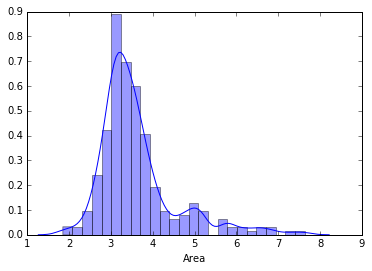

In [56]:
sns.distplot(point_stats_matrix.Area)

How about a boxplot of Area values?

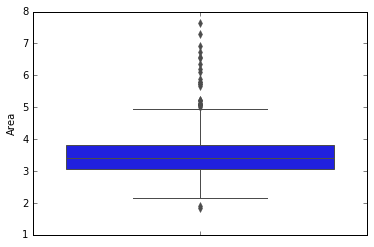

In [57]:
sns.boxplot(y="Area", data=point_stats_matrix)

## Exercise

Take a look at the help for `lmplot` below and make a scatterplot comparing `Intensity Max Z` on the x axis against `Volume` on the y axis. 

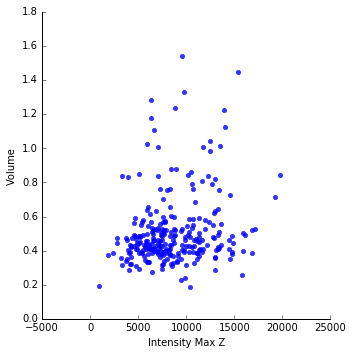

In [60]:
sns.lmplot?
sns.lmplot(x="Intensity Max Z", y="Volume", fit_reg=False, data=point_stats_matrix)

## 2.12 Filtering <a name="filtering"/>

Next we will discuss filtering. The scatterplot you created in the exercise above shows a smattering of points with an unsually large volume. Perhaps we decide that we don't trust that these are isolated points and therefore should exclude these outliers from our dataset. To do this, we will create a DataFrame named `filtered_points` that only includes spots with a volume less than 0.8. 

We do this by first defining a *mask* that will only return the data we are interested in. Our *mask* will remove those rows in the data that do not meet our criterion. 

In [61]:
mask = point_stats_matrix.Volume <= 0.8
filtered_points=point_stats_matrix[mask]
filtered_points.head()

Name,Area,Diameter X,Diameter Y,Diameter Z,Distance from Origin,Distance to Image Border XY,Distance to Image Border XYZ,Generation,Intensity Center X,Intensity Center Y,...,Intensity Sum Z,Number of Spots per Time Point,Number of Voxels,Position X,Position Y,Position Z,Time,Time Index,Total Number of Spots,Volume
ID_Object,,,,,,,,,,,,,,,,,,,,,
0,3.938756,0.714125,0.714125,2.142376,68.008064,4.552320,4.552320,0.0,21506.0,10714.0,...,2625566.0,NaN,723.0,67.017212,-0.427051,11.558883,0.0,1.0,NaN,0.572062
1,3.137991,0.637413,0.637413,1.912238,70.155357,13.380966,7.830497,0.0,15324.0,12245.0,...,1463074.0,NaN,512.0,68.222298,11.472268,11.656747,0.0,1.0,NaN,0.406801
2,3.817468,0.703044,0.703044,2.109132,69.263885,10.561852,7.535184,0.0,20779.0,8598.0,...,2521082.0,NaN,678.0,65.436005,19.603201,11.459882,0.0,1.0,NaN,0.545843
3,3.125721,0.636165,0.636165,1.908496,73.434425,16.353661,8.761987,0.0,13912.0,10521.0,...,917339.0,NaN,508.0,71.194374,12.866990,12.586366,0.0,1.0,NaN,0.404417
4,3.279415,0.651618,0.651618,1.954854,77.221741,13.562042,8.461070,0.0,15095.0,11677.0,...,2820460.0,NaN,547.0,68.410477,33.640778,12.308628,0.0,1.0,NaN,0.434609


Now let's create another scatterplot to confirm that our filter worked:

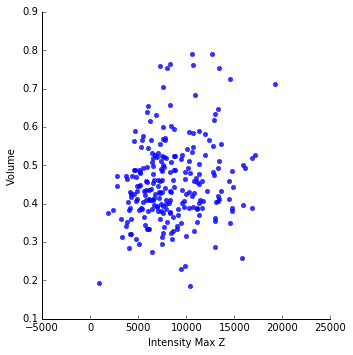

In [62]:
#space for new scatterplot

sns.lmplot(x='Intensity Max Z', y='Volume', fit_reg=False, data=filtered_points)

**Question**: what is the output of `point_stats_matrix.Volume <= 0.8`? Try it out by running the below cell. 
    
How does this output help us to select the rows we want out of `point_stats_matrix`? (Hint: Think about what `True` and `False` mean in this context. Does it mean we want to return that row or not?)

In [63]:
point_stats_matrix.Volume <= 0.8

ID_Object
0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11     False
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
237     True
238     True
239     True
240     True
241     True
242    False
243     True
244     True
245     True
246     True
247     True
248     True
249    False
250     True
251     True
252     True
253     True
254    False
255    False
256     True
257    False
258     True
259     True
260     True
261     True
262     True
263     True
264     True
265     True
266     True
Name: Volume, dtype: bool

## Exercise

Filter the `points_stats_matrix` dataset to have `Intensity Center X > 10000` and assign the result to `psm10000`. (Because of the spaces in the variable names, you will have to use `points_stats_matrix['Intensity Center X']` to access the column).

Re-do the scatter plot of X and Y Intensity Centers to confirm that your filtering worked. 

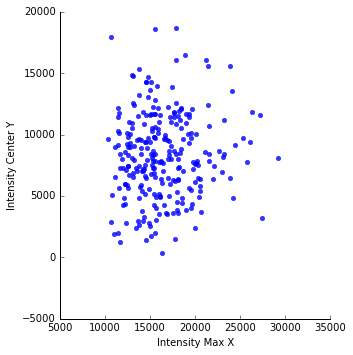

In [64]:
##space for your answer here.
mask= point_stats_matrix["Intensity Center X"] > 10000
psm10000=point_stats_matrix[mask]
sns.lmplot(x='Intensity Max X', y='Intensity Center Y', fit_reg=False, data=psm10000)

## 2.14 Discussion Questions <a name="discuss2"/>

1. What is the difference between `groupby()` and filtering? When would you want to use each of these?
2. What is the difference between filtering and indexing? 

## 2.15 What you learned today <a name="summary"/>

Congrats for getting this far! You have seen lots of features of `pandas` and `seaborne` that let you manipulate the data and visualize it. In particular:

1. Basic `DataFrame`s
1. `group_by`
2. Boxplots and Scatterplots
4. Pivoting data
5. Filtering
6. Merging

There's a lot more about `DataFrames` to learn! Here's some good resources to learn even more:

https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python

# Appendix (Optional)

The following sections are optional.

## Faceting

Faceting is one of the most powerful ways of exploring data. For example, we can see whether there is a `Strain` by `Sex` effect by producing *conditional* boxplots, which separate the data out by condition. This kind of visualization can be critical when exploring the data and looking for conditional effects. For example, we may notice a difference between Strains only for females, and not males.  

Here we plot the distribution of weights conditioned on two variables: `Strain` and `Sex`. Note that these conditions are categorical variables, not numeric variables. 

One thing to notice is that we are passing in arguments to the `distplot` function within `g.map` as arguments to `g.map`. 

In [ ]:
##use sns.FacetGrid to define our facets
g = sns.FacetGrid(mousedata, col="Strain", row="Sex")
##then we can define our plots
g = g.map(sns.distplot, "Weight", bins = 30)

## Merging DataFrames

Another powerful way of manipulating data in Pandas is to combine two `DataFrame`s together. In fact, we actually merged two `DataFrame`s together to get the original `point_stats` `DataFrame`. Let's load in the two separate `DataFrame`s so we can see how we did this. Our new relative path is `data/raw-data/`, since that is where the unmerged data is.

In [ ]:
## we have to use pd.read_table instead of pd.read_csv because the data
## is tab delimited
points_value = pd.read_table("data/raw-data/points-statistics-value.txt", header=None)
points_value.head()

Since there are no column names in the file, we have to add them manually by setting the `columns` property. How does `.columns` know which columns to rename to our new column names? We pass it a list whose values are the new column names:

In [ ]:
new_col_names = ["ID_Time","ID_Object","ID_StatisticsType","Value"]
points_value.columns = new_col_names
points_value.head()

Now let's open the `points-statistics-type.txt` as a table:

In [ ]:
points_type = pd.read_table("data/raw-data/points-statistics-type.txt", header=None)

new_col_names = ["ID_StatisticsType", "ID_Category", "ID_FactorList", "Name", "Unit"]
points_type.columns = new_col_names

points_type.head()

Huh. We notice that both `points_type` and `points_value` have a column called `ID_StatisticsType`. Can we use this to combine the two tables? Yes! There's a function called `.merge()` in `pandas` that will let us do it.

Note we're using a function from `pd`, and not from the `DataFrame` to do this. `pd.merge` takes four arguments:

1. `left` - the left side table, which is `points_value`.
2. `right` - the right side table, which is `points_type`.
3. `left_on` - the column name in the left table that we want to merge on, which is `"ID_StatisticsType"`.
4. `right_on` - the column name in the right table that we want to merge on, which is `"ID_StatisticsType"`.

In [ ]:
merged_table = pd.merge(left=points_value, right=points_type, 
         left_on = "ID_StatisticsType", right_on="ID_StatisticsType")

merged_table.head()

## Getting data out

What if you want to save the `point_stats_matrix` DataFrame as its own csv file? Try running the code below. Where did it write the dataset?

In [ ]:
point_stats_matrix.to_csv("data/point_stats-mod.csv")

There is also support for reading and writing Excel files if you need it: http://pandas.pydata.org/pandas-docs/stable/io.html#excel-files